# Lab 9
## Data analysis 2
### Task 1 Multiiple linear regression

In this task, we will practice how to build a Multiple Linear Regression model to predict a car’s
mpg using its displacement, horsepower, weight and acceleration. 

1. Download the data file “auto-mpg.csv” from GCULearn

2. Import the required libraries

In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

3. Import the ‘auto-mpg’ dataset and checking the number of rows and columns in it

In [21]:
dataset = pd.read_csv('../lab9/auto-mpg.csv')

dataset.shape

(392, 5)

4. Data exploring and pre-processing

In [22]:
print(dataset.dtypes)

print(dataset.head(5))

displacement    float64
horsepower        int64
weight            int64
acceleration    float64
mpg             float64
dtype: object
   displacement  horsepower  weight  acceleration   mpg
0         307.0         130    3504          12.0  18.0
1         350.0         165    3693          11.5  15.0
2         318.0         150    3436          11.0  18.0
3         304.0         150    3433          12.0  16.0
4         302.0         140    3449          10.5  17.0


In [23]:
duplicate_rows = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)


number of duplicate rows:  (1, 5)


In [24]:
dataset = dataset.drop_duplicates()

dataset.count()

displacement    391
horsepower      391
weight          391
acceleration    391
mpg             391
dtype: int64

In [25]:
print(dataset.isnull().sum())

print(dataset.describe)

displacement    0
horsepower      0
weight          0
acceleration    0
mpg             0
dtype: int64
<bound method NDFrame.describe of      displacement  horsepower  weight  acceleration   mpg
0           307.0         130    3504          12.0  18.0
1           350.0         165    3693          11.5  15.0
2           318.0         150    3436          11.0  18.0
3           304.0         150    3433          12.0  16.0
4           302.0         140    3449          10.5  17.0
..            ...         ...     ...           ...   ...
387         140.0          86    2790          15.6  27.0
388          97.0          52    2130          24.6  44.0
389         135.0          84    2295          11.6  32.0
390         120.0          79    2625          18.6  28.0
391         119.0          82    2720          19.4  31.0

[391 rows x 5 columns]>


The output shows no null value in the dataset. Also, based on the values of the
statistics, there is no obvious invalid data in the dataset. So, no further
processes.

              displacement  horsepower    weight  acceleration       mpg
displacement      1.000000    0.897444  0.932840     -0.545407 -0.805149
horsepower        0.897444    1.000000  0.864750     -0.689898 -0.778317
weight            0.932840    0.864750  1.000000     -0.418416 -0.832363
acceleration     -0.545407   -0.689898 -0.418416      1.000000  0.423959
mpg              -0.805149   -0.778317 -0.832363      0.423959  1.000000


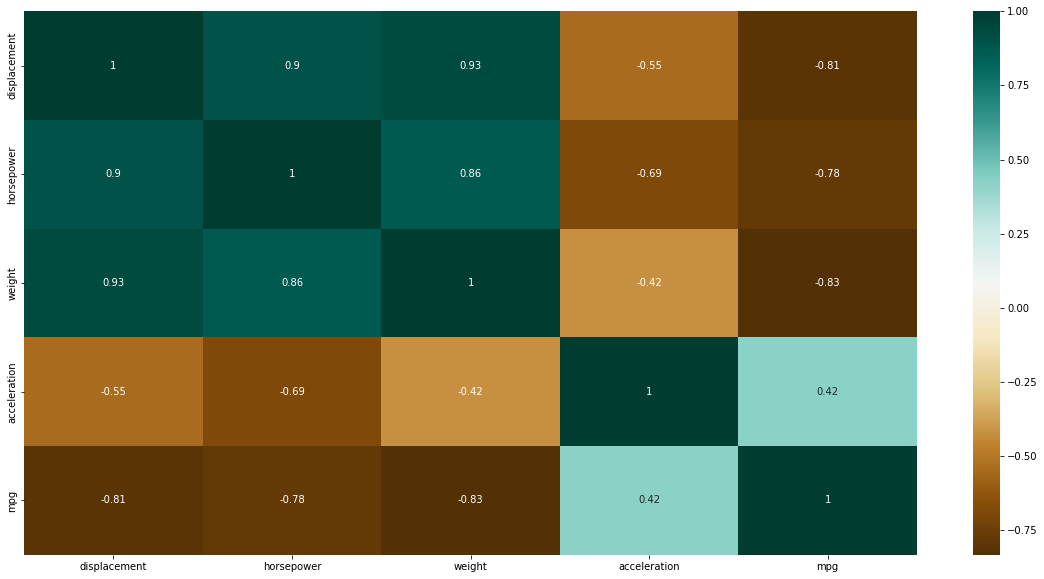

In [26]:
plt.figure(figsize=(20,10))
corl = dataset.corr()
sns.heatmap(corl,cmap="BrBG",annot=True)
print(corl)

The correlation coefficient in between ‘displacement’ and ‘weight’ is 0.93, which
means these two variables are highly correlated. So in the following analysis, it is
reasonable to include only one of these two in the input variables. 

5. Specify the input variables and the target variable.
As mentioned above, ‘displacement’ and ‘weight’ are highly related, we exclude
‘displacement’ from input variables. So we will use the other three variables as
input, and ‘mpg’ as the target varaible to build a multiple linear regression
model.

In [27]:
# Specify the input variable X and target variable y
x = dataset.drop(['displacement', 'mpg'], axis=1)
y = dataset['mpg'].values

# check that the first few variabes in x and y

print(x.head())
print(y[0:5])

   horsepower  weight  acceleration
0         130    3504          12.0
1         165    3693          11.5
2         150    3436          11.0
3         150    3433          12.0
4         140    3449          10.5
[18. 15. 18. 16. 17.]


6. Split 80% of the data to the training dataset while 20% of the data to validation
dataset using the ‘train_test_split’ function

In [96]:
# Split dataset into training dataset and validation dataset:
# 80% training and 20% validation

x_train, x_vali, y_train, y_vali = train_test_split(x, y, test_size=0.2, random_state=1)

print(x_train.shape)

(312, 4)


7. Create a multiple linear regression model using the multiple linear regression
class provided by sklearn library.
Then, use the ‘fit’ function and pass in the training data as parameters to fit the
linear regression model to the training data.

In [97]:
# create multiple linear regression model
regressor = LinearRegression()

# fit the regression model tot he data
regressor.fit(x_train, y_train)

LinearRegression()

8. In the case of multivariable linear regression, the regression model has to find
the most optimal coefficients for all the attributes. To see what coefficients our
regression model has chosen, execute the following script:


In [98]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficiant'])

print(coeff_df)

              Coefficiant
displacement    -0.011444
horsepower      -0.051931
weight          -0.004534
acceleration    -0.211258


9. Let's do prediction on validation data

In [99]:
# prediction on the testing data
y_pred = regressor.predict(x_vali)

10. Check the difference between the actual value and predicted value

In [100]:
# check the difference between the actual values and predicted value

df = pd.DataFrame({'Actual': y_vali, 'Predicted': y_pred})

df1 = df.head(15)
print(df1)

    Actual  Predicted
0     12.0   6.049677
1     22.5  22.678385
2     29.8  31.876913
3     15.0  14.683885
4     12.0   9.578248
5     23.0  26.243654
6     22.0  25.178134
7     18.1  20.140646
8     11.0  15.423345
9     21.0  22.409040
10    30.0  29.390503
11    17.0  19.130326
12    24.0  26.848107
13    24.0  25.597524
14    14.0   9.450024


11. Plot the comparison of Actual and Predicted values

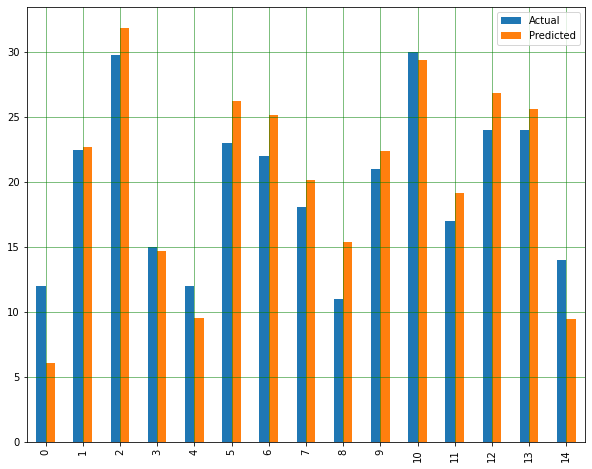

In [101]:
# plot the comparrison of Actual and Predicted values

df1.plot(kind='bar', figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')

plt.show()

12. Evaluation metrics
Evaluate the performance of the algorithm is important to compare how well
different algorithms perform on a particular dataset. For regression algorithms,
three evaluation metrics are commonly used:

1) Mean Absolute Error (MAE) is the mean of the absolute value of the
errors. It is calculated as:

2) Mean Squared Error (MSE) is the mean of the squared errors and is
calculated as:

3) Root Mean Squared Error (RMSE) is the square root of the mean of the
squared errors:

We don’t have to perform these calculations manually. The Scikit-Learn library
comes with pre-built functions that can be used to find out these values for us.

13. Find the values for MAE, MSE, and RMSE to evaluate the performance of the
algorithm

In [102]:
# evaluation metrics

print('Mean absolute error: ', metrics.mean_absolute_error(y_vali, y_pred))

print('Mean squared error: ', metrics.mean_squared_error(y_vali, y_pred))

print('Root mean squared: ', np.sqrt(metrics.mean_squared_error(y_vali, y_pred)))

Mean absolute error:  3.2583629628501485
Mean squared error:  20.471413284707843
Root mean squared:  4.524534593160698


14. Tune the Linear Regression model

As described on https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LinearRegressio
n.html, sklearn.linear_model.LinearRegression has multiple parameters as
shown below:

In step 7, the regressor was created with all parameters set to default values.
Now, let’s create a multiple linear regression model with ‘fit_intercept’ to be
‘False’


In [103]:
# create multiple linear regression model

regressor = LinearRegression(fit_intercept=False)


Re-run step 8 – 14, check how the coefficients in the trained regression model
and the values of evolution metrics change.

15. Check the significant of feature selection
In step 5, ‘displacement’ was excluded from input variables. Try include
‘displacement’ in the input variables using:

In [105]:
# specify the input variable x and target variable y

x = dataset.drop(['mpg'], axis=1)
y = dataset['mpg'].values

# check that the first few variables in x and y
print(x.head())
print(y[0:5])

   displacement  horsepower  weight  acceleration
0         307.0         130    3504          12.0
1         350.0         165    3693          11.5
2         318.0         150    3436          11.0
3         304.0         150    3433          12.0
4         302.0         140    3449          10.5
[18. 15. 18. 16. 17.]
